# Clustering

## Concepts

- k-Means Clustering
- Agglomerative Clustering
- DBSCAN
- Linear Discriminant Analysis (LDA)
- Curse of Dimensionality
- Euclidean Distance
- Silhouette Score
- ARI

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

- Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features. Clustering is a method of unsupervised learning and is a common technique for statistical data analysis used in many fields.

- We can use clustering analysis to gain some valuable insights from our data by seeing what groups the data points fall into when we apply a clustering algorithm.

### What is clustering used for?
- Inventory categorization
- Behavioral segmentation (e.g. by purchase history, activities on application, website, or platform)
- Define personas based on interests
- Create profiles based on activity monitoring
- Detect activity types in motion sensors
- Group images
- Separate audio
- Identify groups in health monitoring
- Detecting bots
- Anomaly or outlier detection

## k-Means Clustering

Can be used to segment customers.
- One hyperparameter: k!
- Rule of thumb: no more than 10 dimensions.

Cons:
- Need to work out k-value ourselves!
- Clusters are spherical, equal size

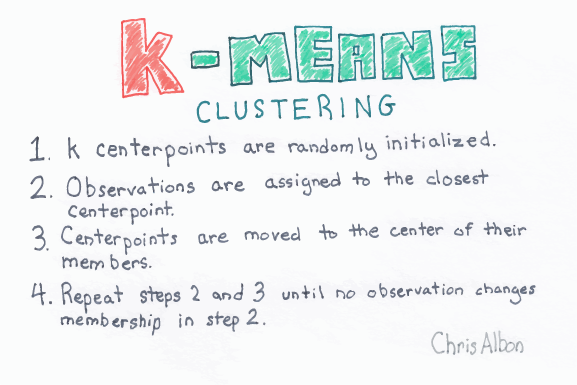

1. To begin, we first select a number of classes/groups to use and randomly initialize their respective center points. To figure out the number of classes to use, it’s good to take a quick look at the data and try to identify any distinct groupings. The center points are vectors of the same length as each data point vector.


2. Each data point is classified by computing the distance between that point and each group center, and then classifying the point to be in the group whose center is closest to it.


3. Based on these classified points, we recompute the group center by taking the mean of all the vectors in the group.


4. Repeat these steps for a set number of iterations or until the group centers don’t change much between iterations. You can also opt to randomly initialize the group centers a few times, and then select the run that looks like it provided the best results.

**Advantages:**
- pretty fast, as all we’re really doing is computing the distances between points and group centers; very few computations! 
- It thus has a linear complexity O(n).

**Disadvantages:**
- Need to work out k-value ourselves! Need to select how many groups/classes there are. This isn’t always trivial and ideally with a clustering algorithm we’d want it to figure those out for us to gain insight from the data. 
- Clusters are spherical, equal size
- K-means also starts with a random choice of cluster centers and therefore it may yield different clustering results on different runs of the algorithm. Other cluster methods are more consistent!

**Note** :K-Medians is another clustering algorithm related to K-Means, except instead of recomputing the group center points using the mean we use the median vector of the group. This method is less sensitive to outliers (because of using the Median) but is much slower for larger datasets.

### The K-Means Algorithm
- The K-means clustering algorithm uses iterative refinement to produce a final result.
- The algorithm inputs are the number of clusters K and the data set.
- The data set is a collection of features for each data point.
- The algorithms starts with initial estimates for the Κ centroids, which can either be randomly generated or randomly selected from the data set.

The algorithm then iterates between two steps:

#### Step 1: Data assigment
- Each centroid defines one of the clusters.
- Each data point is assigned to its nearest centroid, based on the squared Euclidean distance:

\begin{align}
\underset{c_i  \in  C}{\mathbf{argmin}} \ \ dist\left(c_i, x \right)^2
\end{align}

If ci is the collection of centroids in set C, then each data point x is assigned to a cluster based on where dist() is the standard (L2) Euclidean distance.

#### Step 2: Centroid update step
In this step, the centroids are recomputed. This is done by taking the mean of all data points assigned to that centroid’s cluster.

\begin{align}
c_i=\frac{1}{|S_i|}\sum_{x_i \in S_i x_i}
\end{align}

The algorithm iterates between steps one and two until a stopping criteria is met (i.e., some maximum number of iterations is reached).

Starting centroids can be randomized.

## Mean-Shift Clustering

It is a centroid-based algorithm meaning that the goal is to locate the center points of each group/class, which works by updating candidates for center points to be the mean of the points within the sliding-window

See link!

In contrast to K-means clustering there is no need to select the number of clusters as mean-shift automatically discovers this. That’s a massive advantage. The fact that the cluster centers converge towards the points of maximum density is also quite desirable as it is quite intuitive to understand and fits well in a naturally data-driven sense. The drawback is that the selection of the window size/radius “r” can be non-trivial.

## DBSCAN - Density Based Spatial Clustering of Applications with Noise

DBSCAN is a density based clustered algorithm similar to mean-shift, but with a couple of notable advantages.

- Used in particular for Outlier Detection!
- 2 Hyperparameters: number of points, distance point to point
- Clusters and outliers

**YOU DO NOT SPECIFY THE NUMBER OF CLUSTERS UP FRONT!**

You specify the number of points in the cluster!

eg number or points >= 3, max_dist = 7cm 

If you increase max_distance to 70cm, you would have a giant cluster. Conversely, if you decreased the max_dist to 1cm you would have looads of outliers!

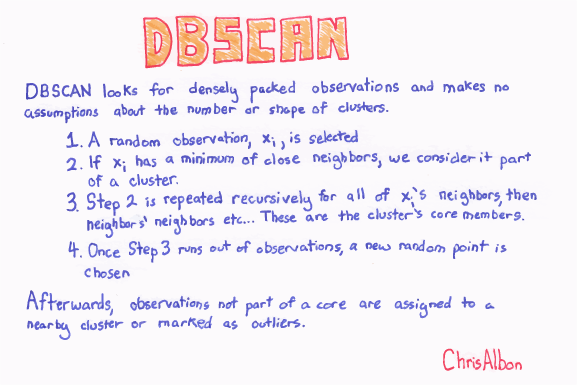

DBSCAN can handle clusters with lots of very different shapes!

1. DBSCAN begins with an arbitrary starting data point that has not been visited. The neighborhood of this point is extracted using a distance epsilon ε (All points which are within the ε distance are neighborhood points).


2. If there are a sufficient number of points (according to minPoints) within this neighborhood then the clustering starts and the current data point becomes the first point in the new cluster. Otherwise, the point will be labeled as noise - outlier!


3. For this first point in the new cluster, the points within its ε distance neighborhood also become part of the same cluster. This procedure of making all points in the ε neighborhood belong to the same cluster is then repeated for all of the new points that have been just added to the cluster group.


4. This process of steps 2 and 3 is repeated until all points in the cluster are determined i.e. all points visited and labelled.


5. Once we’re done with the current cluster, a new unvisited point is retrieved and processed, leading to the discovery of a further cluster or noise. This process repeats until all points are marked as visited. Since at the end of this all points have been visited, each point well have been marked as either belonging to a cluster or being noise i.e. outlier!

#### DBSCAN poses some great advantages over other clustering algorithms!
- it does not require a pe-set number of clusters at all
- it also identifies outliers as noises unlike mean-shift which simply throws them into a cluster even if the data point is very different.
- Additionally, it is able to find arbitrarily sized and arbitrarily shaped clusters quite well.

Disadvantages:
- it doesn’t perform as well as others when the clusters are of varying density. This is because the setting of the distance threshold ε and minPoints for identifying the neighborhood points will vary from cluster to cluster when the density varies.

## Linear Discriminant Analysis - LDA
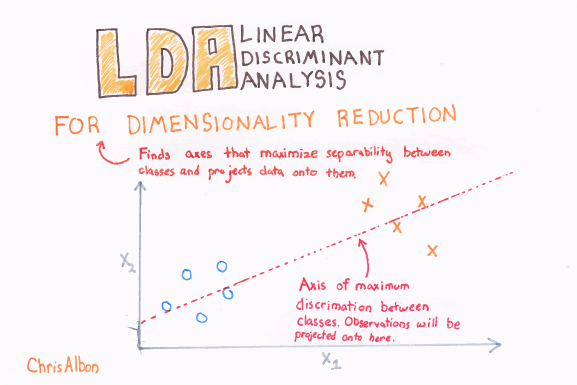

### Curse of Dimensionality

As the dimensionality of the features space increases, the number configurations can grow exponentially, and thus the number of configurations covered by an observation decreases.

## Expectation–Maximization (EM) Clustering using Gaussian Mixture Models (GMM)

With GMMs we assume that the data points are Gaussian distributed; this is a less restrictive assumption than saying they are circular by using the mean. That way, we have two parameters to describe the shape of the clusters: the mean and the standard deviation!

See link!

## Agglomerative Hierarchical Clustering

All observations start as their own cluster. Clusters meeting some criteria are merged. This process is repeated, growing clusters until some end point is reached! - C.A.

Hierarchical clustering algorithms actually fall into 2 categories: top-down or bottom-up. 

Bottom-up algorithms treat each data point as a single cluster at the outset and then successively merge (or agglomerate) pairs of clusters until all clusters have been merged into a single cluster.

**It is therefore called called hierarchical agglomerative clustering or HAC!** This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. 

1. We begin by treating each data point as a single cluster i.e if there are X data points in our dataset then we have X clusters. We then select a distance metric that measures the distance between two clusters. eg. Average linkage: the distance between two clusters is the average distance between data points in the first cluster and data points in the second cluster.


2. On each iteration we combine two clusters into one. The two clusters to be combined are selected as those with the smallest average linkage. These two clusters have the smallest distance between each other and therefore are the most similar and should be combined!


3. Step 2 is repeated until we reach the root of the tree i.e we only have one cluster which contains all data points. In this way we can select how many clusters we want in the end, simply by choosing when to stop combining the clusters i.e when we stop building the tree!


**Advantages:**
- Hierarchical clustering does not require us to specify the number of clusters and we can even select which number of clusters looks best since we are building a tree!
- The algorithm is not sensitive to the choice of distance metric; all of them tend to work equally well whereas with other clustering algorithms, the choice of distance metric is critical.

A particularly good use case of hierarchical clustering methods is when the underlying data has a hierarchical structure and you want to recover the hierarchy; other clustering algorithms can’t do this. These advantages of hierarchical clustering come at the cost of lower efficiency, as it has a time complexity of O(n³), unlike the linear complexity of K-Means and GMM.

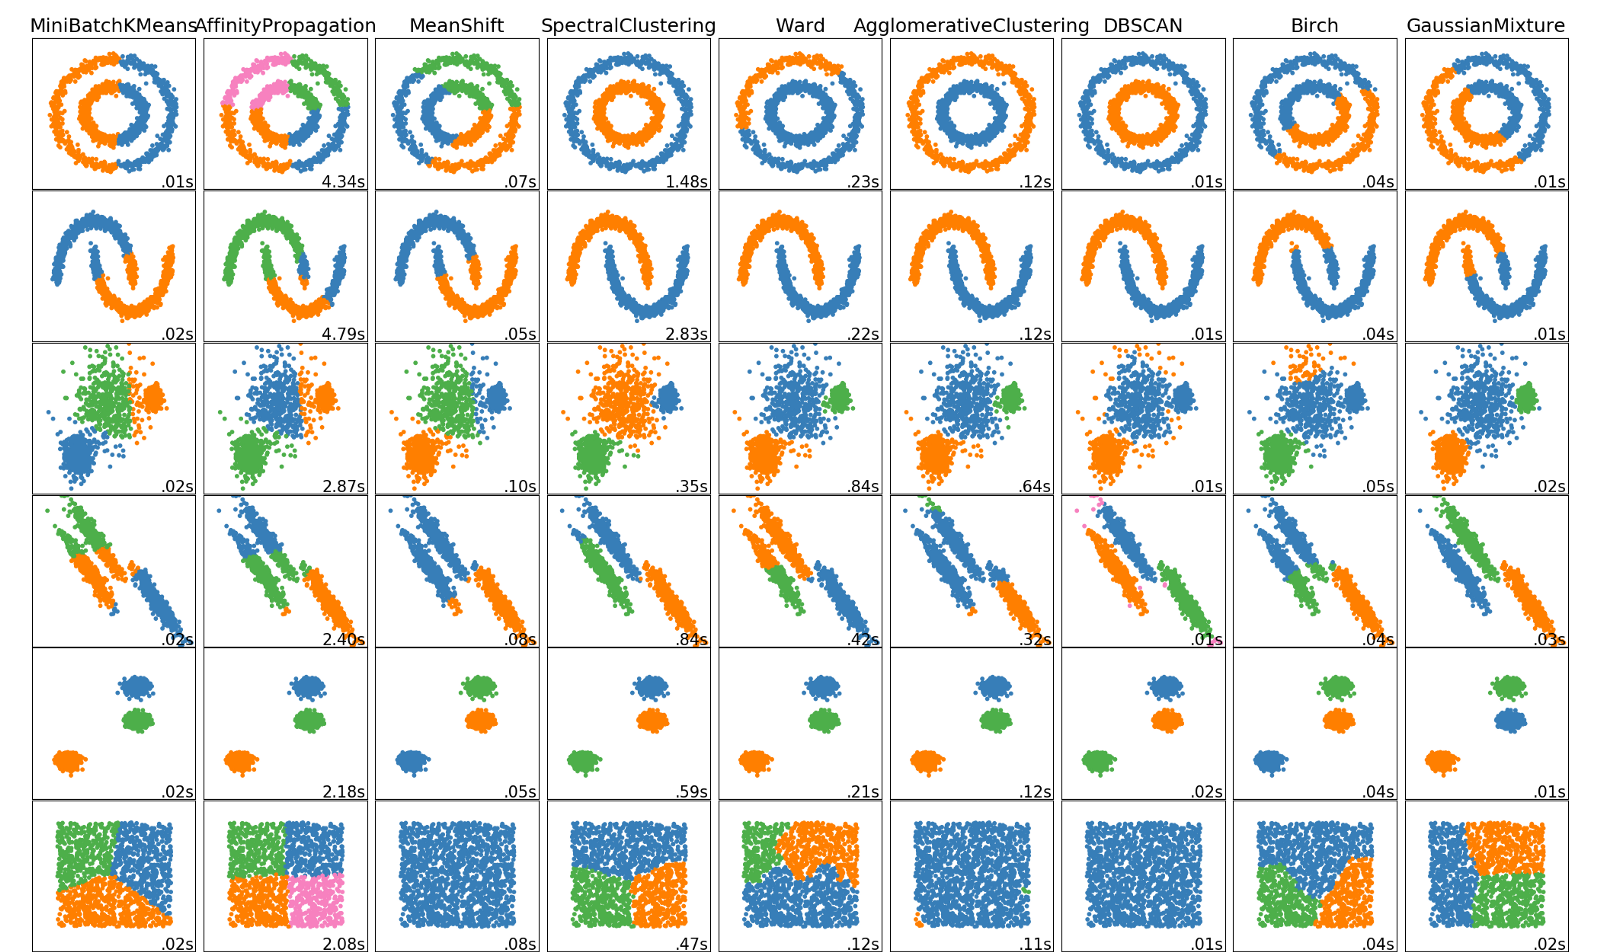

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

n_samples = 1500

noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)


for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

## Exercises

### 1. Compare the clustering of k-Means and DBScan on the moons dataset

In [1]:
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import KMeans, DBSCAN

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

X, y = make_moons(noise = 0.3)

In [2]:
X.shape, y.shape

((100, 2), (100,))

Text(0, 0.5, 'x2')

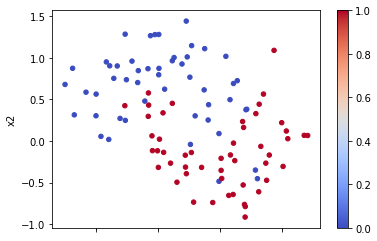

In [3]:
df = pd.DataFrame(X)
df.plot.scatter(0,1, c=y, cmap='coolwarm')

plt.xlabel('x1')
plt.ylabel('x2')

In [5]:
from sklearn.tree import export_graphviz, DecisionTreeClassifier
import graphviz
import os

x, y = make_moons()

m = DecisionTreeClassifier(max_depth=3)
m.fit(x, y)

# create string in .dot format
tree = export_graphviz(m, out_file=None,
                       class_names=["A", "B"],
                       feature_names=['x1', 'x2'],
                       impurity=False,
                       filled=True)

open('moons.dot', 'w').write(tree)

graph = graphviz.Source(tree)
graph.render('moons')  # creates PDF
graph  # in Jupyter

# PNG conversion (tested on Ubuntu)
cmd = "dot -Tpng moons.dot -o tree_graphviz.png"
os.system(cmd)

0

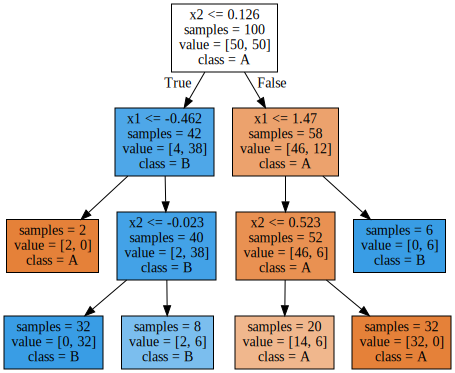

In [7]:
graph

0.81


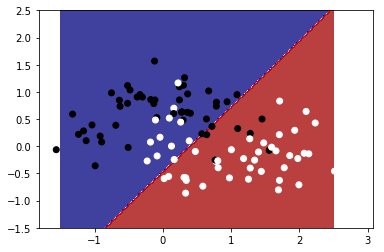

In [9]:
import numpy as np
from sklearn.svm import SVC

X, y = make_moons(noise=.3, random_state=42)

m = SVC(kernel='rbf', gamma=0.1, C=0.1)
m.fit(X, y)
print(m.score(X, y))

N = 200
coord = np.linspace(-1.5, 2.5, N)
xx, yy = np.meshgrid(coord, coord)

Xpred = np.array(list(zip(xx.reshape(N ** 2), yy.reshape(N ** 2))))
ypred = m.predict(Xpred)

colors = np.array(['black', 'white'])

Z = ypred.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.seismic)

plt.scatter(X[:, 0], X[:, 1], color=colors[y])

plt.show()

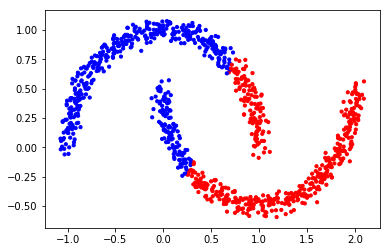

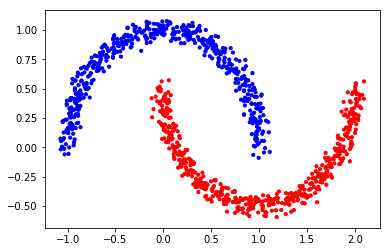

In [11]:
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
import numpy as np

colors = np.array(['red', 'blue', 'green', 'orange', 'black', 'yellow']*100)

# generate data
moons = datasets.make_moons(n_samples=1000, noise=.05)[0]
blobs = datasets.make_blobs(n_samples=1000, random_state=8)[0]

# algorithm 1: KMeans
kmeans = cluster.MiniBatchKMeans(n_clusters=2)
kmeans.fit(moons)
clusters_k = kmeans.predict(moons)

plt.scatter(moons[:, 0], moons[:, 1], s=10, 
            color=colors[clusters_k])
plt.show()

# algorithm 2: DBSCAN
dbscan = cluster.DBSCAN(eps=0.3)
dbscan.fit(moons)
clusters_db = dbscan.labels_.astype(np.int)

plt.scatter(moons[:, 0], moons[:, 1], s=10, 
            color=colors[clusters_db])
plt.show()

### 2. Exchange moons for blobs

### 3. Try to change the parameters n_clusters and eps to improve the clustering

## Anomaly Detection
**Anomaly Detection** or **Outlier Detection** finds unusual data points.

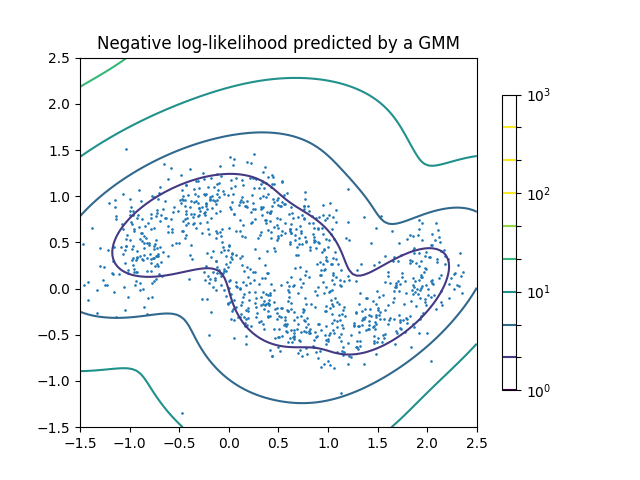

Anomaly detection can be used e.g. for detecting credit card fraud. The problem is that the anomalies are very rare. This leads to a huge class imbalance between outliers and non-outliers. Therefore, the normal supervised learning techniques do not work.

### What methods are used?
- Gaussian Mixtures
- DBSCAN
- Jaccard Distance
- cosine similarity

## Examples

### Gaussian Mixture

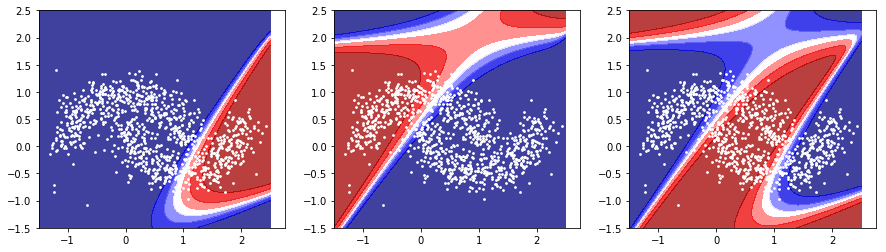

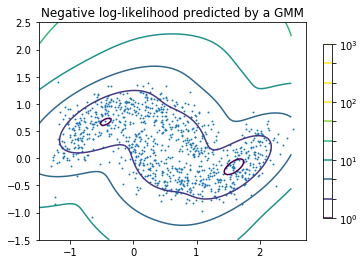

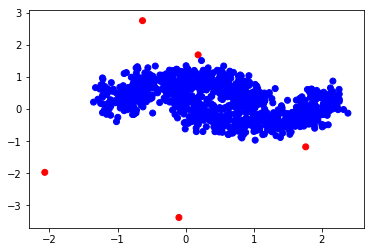

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.mixture import GaussianMixture


X, _ = make_moons(1000, noise=0.2)
outliers = np.random.normal(0.0, 1.0, (10, 2))

x = np.concatenate([X, outliers])


NCOMP = 3

gmm = GaussianMixture(n_components=NCOMP)
gmm.fit(x)

N = 100
coord = np.linspace(-1.5, 2.5, N)
xx, yy = np.meshgrid(coord, coord)
zz = np.array([xx.ravel(), yy.ravel()]).T

p = gmm.predict_proba(zz)


plt.figure(figsize=(15, 4))
for icomp in range(NCOMP):
    plt.subplot(1, NCOMP, icomp+1)
    comp = p[:, icomp].reshape(xx.shape)
    plt.contourf(xx, yy, comp, alpha=0.75, cmap=plt.cm.seismic)
    plt.scatter(x[:, 0], x[:, 1], color='white', s=3)


plt.figure()
from matplotlib.colors import LogNorm

z = -gmm.score_samples(zz)
z = z.reshape(xx.shape)

CS = plt.contour(xx, yy, z, norm=LogNorm(vmin=1.0, vmax=100.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(x[:, 0], x[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')

plt.show()


# DBSCAN

from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN

X, _ = make_moons(1000, noise=0.2)
outliers = np.random.normal(0.0, 1.0, (10, 2))

x = np.concatenate([X, outliers])


m = DBSCAN(eps=0.3)
m.fit(x)

c = m.fit_predict(x)

cols = np.array(['blue', 'red'])
c = m.labels_.astype(np.int)

plt.scatter(x[:,0], x[:,1], c=cols[c])
plt.show()

### DBSCAN

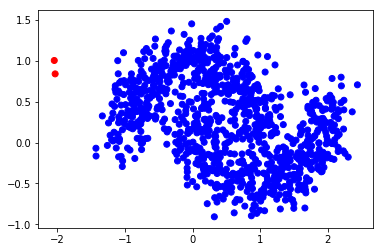

In [12]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN

X, _ = make_moons(1000, noise=0.2)
outliers = np.random.normal(0.0, 1.0, (10, 2))

x = np.concatenate([X, outliers])


m = DBSCAN(eps=0.3)
m.fit(x)

c = m.fit_predict(x)

cols = np.array(['blue', 'red'])
c = m.labels_.astype(np.int)

plt.scatter(x[:,0], x[:,1], c=cols[c])
plt.show()

## Unsupervised Learning Methods

| method | description |
|--------|-------------|
| Principal Component Analysis (PCA) | maps data from m to n dimensions with n <= m. New dimensions are ranked. |
| Non-negative Matrix Factorization (NMF) | maps data to n dimensions with equivalent priority |
| K-means-clustering | finds k spherical clusters |
| agglomerative clustering | hierarchical clustering merges points iteratively to a tree-like structure |
| DBScan | two hyperparameters control the number of clusters indirectly. Identifies outliers |
| t-SNE	| reduces data to two dimensions, good for visualizing |
| Gaussian Mixture Models (GMM) | generative model that detects outliers |

## Exercise
- In this exercise, we will extract properties of ships. We will learn to know both Clustering and Principal Component Analysis.

Each exercise provides one **Character* of a solution. The Solution has 15 characters and has to do with ships.*

### Exercise 1
- Read the file with the biggest ships in the world using pandas. Set the index to the name of the ship.
- Character 1: The first character of the last ship.

In [13]:
import pandas as pd

In [16]:
df = pd.read_csv('ships.csv', index_col='name')
df

,type,GRT,GRN,DWT,water vol,length,beam,height,draft,year in service,status
name,,,,,,,,,,,
Prelude FLNG,gas platform,NaN,300000.0,NaN,NaN,488.00,74.00,105.00,NaN,NaN,being built
Jahre Viking,tanker,NaN,260941.0,564650.0,647955.00,458.45,68.80,NaN,24.61,NaN,retired
Pierre Guillaumat,tanker,277000.0,274838.0,555051.0,630962.00,414.23,63.05,NaN,28.60,1977,retired
UASC Barzan,container ship,NaN,193300.0,190000.0,NaN,400.00,58.60,NaN,16.00,NaN,in service
Majestic Mærsk,container ship,NaN,194849.0,194153.0,NaN,399.00,59.00,73.00,15.50,2013,in service
Emma Mærsk,container ship,NaN,176794.0,158200.0,218788.00,397.00,56.40,69.40,16.50,2006,in service
CMA CGM Marco Polo,container ship,NaN,175343.0,187625.0,NaN,396.00,53.60,NaN,16.00,NaN,in service
MSC Oscar,container ship,NaN,192237.0,199273.0,NaN,395.40,59.00,NaN,16.00,NaN,in service
Pioneering Spirit,pipe laying ship,NaN,403342.0,NaN,900000.00,382.00,123.75,NaN,27.00,NaN,being equipped


In [20]:
char1 = df.index[-1][0]
char1

'P'

### Exercise 2
- Examine the data frame using pandas functions.
- Character 2: Which ship has a draft below 3 meters (first letter of status column)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Prelude FLNG to Preußen
Data columns (total 11 columns):
type               50 non-null object
GRT                5 non-null float64
GRN                31 non-null float64
DWT                26 non-null float64
water vol          27 non-null float64
length             50 non-null float64
beam               50 non-null float64
height             22 non-null float64
draft              44 non-null float64
year in service    14 non-null object
status             49 non-null object
dtypes: float64(8), object(3)
memory usage: 7.2+ KB


In [26]:
df[df['draft'] < 3]

,type,GRT,GRN,DWT,water vol,length,beam,height,draft,year in service,status
name,,,,,,,,,,,
Hermann Marwede,rescue ship,NaN,NaN,NaN,404.0,46.0,10.25,NaN,2.8,2003,in service


In [31]:
char2 = df[df['draft'] < 3]['status'][0][0]
char2

'i'

### Exercise 3
- Use the function `df[COLNAME].value_counts()` to gain an overview over the columns type and status.
- Character 3-5: 
    - Last and second character of most frequent type
    - Last character of last status

In [74]:
char3 = df['type'].value_counts().index[0][-1]
char3

'r'

In [47]:
char4 = df['type'].value_counts().index[0][1]
char4

'a'

In [276]:
df['status'].value_counts()

in service        34
retired            7
sunken             3
out of service     2
shipwrecked        2
being built        1
being equipped     1
Name: status, dtype: int64

In [277]:
char5 = df['status'].value_counts().index[-2][-1]
char5

't'

### Exercise 4
- Use `pd.plotting.scatter_matrix(df)` to see correlations.
- Character 6: Which histogram is more or less normally distributed (second character of column name)

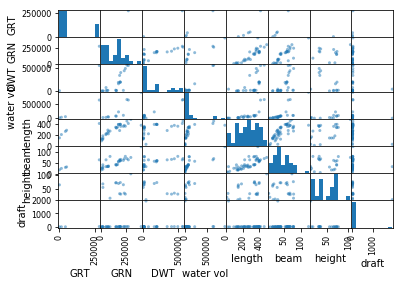

In [61]:
scatter = pd.plotting.scatter_matrix(df)
scatter
plt.show()

In [88]:
char6 = df['length'].name[1]
char6

'e'

### Exercise 5
- Plot the length of ships against their height in a scatter plot (use df.plot.scatter).
- Character 7: Look for a group of three vertically aligned points at length 180m. Take the first character of the height of the middle point (the number as a word).

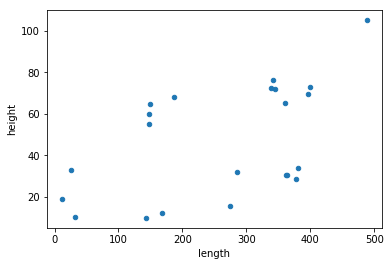

In [128]:
df.plot.scatter(x='length', y='height')

In [129]:
middle_point_height = 'sixty'

In [131]:
char7 = middle_point_height[0]
char7

's'

### Exercise 6
- One entry contains a data error. Examine the diagrams, find and repair the error in the CSV file.

**Hint: Try `df[COLUMN].hist()` or `df[COLUMN].value_counts()`**

- Character 8: What is the name of the ship with the error (second character)

In [134]:
df.head(1)

,type,GRT,GRN,DWT,water vol,length,beam,height,draft,year in service,status
name,,,,,,,,,,,
Prelude FLNG,gas platform,NaN,300000.0,NaN,NaN,488.0,74.0,105.0,NaN,NaN,being built


In [158]:
data_error = df['year in service'].value_counts().index[-1]
data_error

'sunken'

In [167]:
df[df['year in service'] == data_error]

,type,GRT,GRN,DWT,water vol,length,beam,height,draft,year in service,status
name,,,,,,,,,,,
HMS Hood,battleship,NaN,NaN,41200.0,262.3,32.0,31.7,10.1,1918.0,sunken,NaN


In [163]:
char8 = df[df['year in service'] == data_error].index[0][1]
char8

'M'

In [171]:
#corrected DataFrame in Atom
df = pd.read_csv('ships.csv', index_col='name')

In [173]:
df[df.index == 'HMS Hood']

,type,GRT,GRN,DWT,water vol,length,beam,height,draft,year in service,status
name,,,,,,,,,,,
HMS Hood,battleship,NaN,NaN,41200.0,262.3,32.0,31.7,10.1,1918.0,NaN,sunken


### Exercise 7
- Extract the columns GRN, DWT, length, beam and draft. Delete the NaN values from the table afterwards.
- Save the result in a DataFrame called subset. Use print(df.shape) to make sure that the DataFrame contains 22 entries.
- Character 9: What type do the columns have? (first character).


In [177]:
subset = df[['GRN', 'DWT', 'length', 'beam', 'draft']].dropna()

In [178]:
subset.shape

(22, 5)

In [190]:
type(subset['GRN'])

pandas.core.series.Series

In [192]:
char9 = 'S'
char9

'S'

### Exercise 8
- For processing the data with scikit-learn we will need a NumPy array. Use an attribute of the DataFrame to obtain the array.
- Store it in a variable X.
- Character 10: How is this attribute called? (last character)

In [201]:
X = subset.values

In [202]:
char10 = 's'

### Exercise 9
- Cluster the data using KMeans-clustering into 4 Clusters:

        from ______.cluster import KMeans

        kmeans = KMeans(______=4, random_state=0)
        kmeans.______(______)
        print(______.labels_)

Fill in the gaps: fit, kmeans, n_clusters, sklearn, X

- Character 11: Which word belongs into the first gap? (5th+6th character)

In [203]:
from sklearn.cluster import KMeans

In [225]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
print(kmeans.labels_)

[0 0 2 2 2 2 2 0 0 0 1 1 1 1 3 2 3 3 3 3 3 3]


In [230]:
cluster = list(kmeans.labels_)
cluster

[0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 3, 2, 3, 3, 3, 3, 3, 3]

In [207]:
char11 = 'sklearn'
char11 = char11[4:6]
char11

'ar'

### Exercise 10
- Check http://scikit-learn.org in the section

`4.3. Preprocessing data`

- Scale the data to values between 0 and 1. Save the scaled array in a variable. Repeat the clustering. Do the cluster assignments change?

- The following command saves the clusters in the cleaned DataFrame:

`subset['cluster'] = kmeans.labels_`

- Characters 12: Which is the deepest ship in the same cluster as the ‘Kizomba A’? (last character)

In [209]:
from sklearn.preprocessing import MinMaxScaler

In [210]:
minmax = MinMaxScaler()

In [237]:
subset_cleaned = minmax.fit_transform(subset)

In [238]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_cleaned)
print(kmeans.labels_)

[0 0 2 2 2 2 2 0 0 0 2 1 1 1 1 0 3 1 3 3 3 3]


In [239]:
cluster_cleaned = list(kmeans.labels_)

In [240]:
cluster

[0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 3, 2, 3, 3, 3, 3, 3, 3]

In [241]:
cluster_cleaned

[0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 1, 3, 3, 3, 3]

Most stayed the same but a few changed!

In [245]:
subset['cluster'] = kmeans.labels_

In [250]:
kizombaA_cluster = subset[subset.index == 'Kizomba A']['cluster'][0]
kizombaA_cluster

0

In [251]:
subset[(subset['cluster'] == kizombaA_cluster) & (subset)]

,GRN,DWT,length,beam,draft,cluster
name,,,,,,
Jahre Viking,260941.0,564650.0,458.45,68.80,24.61,0
Pierre Guillaumat,274838.0,555051.0,414.23,63.05,28.60,0
TI Europe,234006.0,442000.0,380.00,68.00,24.53,0
Nanny,245140.0,491120.0,364.04,79.04,24.00,0
Vale Brasil,198980.0,402347.0,362.00,65.06,23.00,0
Kizomba A,187864.0,340660.0,285.00,63.00,24.40,0


In [257]:
char12 = '_'

### Exercise 11
- Color the clusters. You need a function assign_color(cluster) that gets the cluster number (0 - 3) and returns a color, e.g. ('blue', 'green', 'red' or 'orange').

- Fix the bugs in the code

        def assign_clr(cluter):
            return ["blue", "green", "red", "range"][cluter]

        colrs = ubet['cluter'].apply(aign_color)
        ubet.plt.catter('length', 'beam', ubset['length'] / 5, c=clr)
        plt.avefig('clusters.png')

- Characters 13+14: The two characters that needed to be fixed, in alphabetical order.

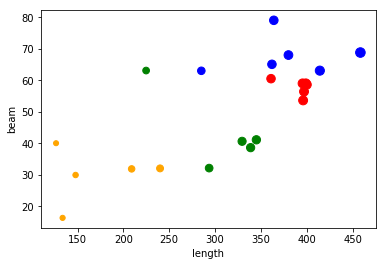

In [255]:
def assign_color(cluster):
    return ["blue", "green", "red", "orange"][cluster]

colors = subset['cluster'].apply(assign_color)
subset.plot.scatter('length', 'beam', subset['length'] / 5, c=colors)
plt.savefig('clusters.png')

In [256]:
char13 = 'o'

In [258]:
char14 = 's'

### Exercise 12
- Finally, we run a PCA. The following code identifies two principal components. There are three bugs in the code. Find and fix them.

::

    from sklearn.decomposition import PCA

    pca = PCA(n_components=2) pca.fit(X) xt = pca.transform(x)

    plt.figure{} plt.plot(xt[:, 0], xt[:, 1], ‘ro’) plt.savefig(principalcomponents.png)

- Character 15: The last character in the abbreviation of Principal Component Analysis


In [261]:
from sklearn.decomposition import PCA

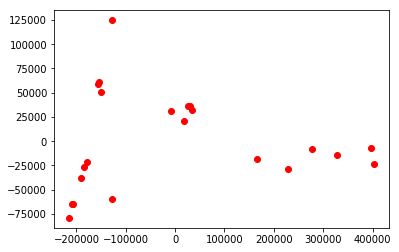

In [267]:
pca = PCA(n_components=2) 

pca.fit(X)

xt = pca.transform(X)

plt.figure()

plt.plot(xt[:, 0], xt[:, 1], 'ro') 
    
plt.savefig('principalcomponents.png')

In [268]:
char15 = 'PCA'
char15 = char15[-1]
char15

'A'

### Exercise 13

- Show the components with:

`print(pca.components_)`

- Plot the components using a heatmap:

        names = list(subset.columns)

        plt.figure()
        plt.matshow(pca.components_, cmap='viridis')
        plt.yticks([0, 1], ["1. PC", "2. PC"])
        plt.colorbar()
        plt.xticks(range(len(names)), names, rotation=60, ha='left')
        plt.xlabel('Feature')
        plt.ylabel('Principal Components')
        plt.savefig('PCA_heatmap.png')

In [270]:
print(pca.components_)

[[ 3.30622852e-01  9.43762908e-01  3.14467582e-04  6.33894039e-05
   3.35802553e-05]
 [ 9.43762104e-01 -3.30622987e-01  1.23472098e-03  8.40149815e-05
  -9.82320003e-07]]


<Figure size 432x288 with 0 Axes>

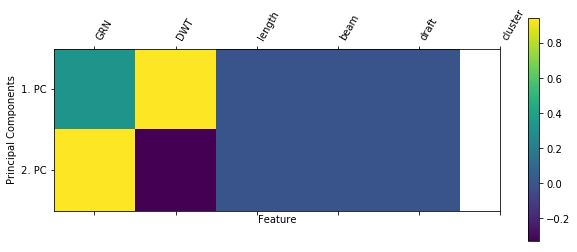

In [272]:
names = list(subset.columns)

plt.figure()
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["1. PC", "2. PC"])
plt.colorbar()
plt.xticks(range(len(names)), names, rotation=60, ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal Components')
plt.savefig('PCA_heatmap.png')

In [278]:
char1+char2+char3+char4+char5+char6+char7+char8+char9+char10+char11+char12 +char13+char14+char15

'PiratesMSsar_osA'